#[Our_name]
آية عثمان مراد

أمامة جهاد عوير

أمل حسن رجب

<h1 style="text-align: center;">Text Classification<h1>

In [8]:
!pip install pyarabic
!pip install arabic_reshaper
!pip install python-bidi


Prepare libraries

In [9]:
# here put every import you need e.g. import nltk
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import nltk
from nltk.tokenize import RegexpTokenizer, TreebankWordTokenizer, TweetTokenizer, TreebankWordDetokenizer , word_tokenize
from nltk import FreqDist, bigrams, trigrams, collocations
from operator import itemgetter
from pyarabic.araby import tokenize, normalize_hamza
from collections import Counter
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt            # library for visualization
import matplotlib
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras import layers
import re
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


Download data

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1cMSjxa3nA706LIZDEhwMpaVRMY2IX9P0' -O 'data.zip'

In [ ]:
!unzip data.zip

<h2 dir="rtl">مثال عن كيفية تنظيف حلول الطلبات:</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [ ]:
# your code here


In [ ]:
# example test

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# Question [1]: Load the data

## [1.1]

In [5]:
# your code here
train = pd.read_csv("train.csv")
train.head(10)
test = pd.read_csv("test.csv")
#test.head(10)
val = pd.read_csv("val.csv")
#validation.head(10)

train = train.dropna()
train = train.drop_duplicates()
test = test.dropna()
test = test.drop_duplicates()
val = val.dropna()
val = val.drop_duplicates()
train.head(10)

,question,answer,label
0,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...,\n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على...,الدم
1,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...,\n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب است...,الاورام-الخبيثة-والحميدة
2,\nحلول منزلية لأعراض ارتفاع ضغط الدم,\n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى...,جراحة-عامة
3,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nراجع طبيبك من اجري الجراحه افضل من يجيب لا...,أمراض-الجهاز-التنفسي
4,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...,\n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح ....,مرض-السكري
5,\nالسلام عليكم انا شاب 25 سنه وظهرلي زي كوره م...,\n\nلا يمكن الإجابة على هذا السؤال بدون فحص يج...,أمراض-الدم
6,\nورمه قبل ثلاث سنوات كان حجمها ٣ انش ولاكن فج...,\n\nالفحص سليم من عدا أمرين:\n١. تضخم بسيط وحم...,الغدد-الصماء
7,\nعملت عن البواسير منذ شهر وعانيت خلال التبرز ...,\n\nلا يوحد مشكلة بالمشي. الاكثار من شرب السوا...,الجهاز-التنفسي
8,\nبالله عليكم امي اجريت عملية جراحية على فخذها...,\n\nانها السيروما سائل من الانسجة بعد الجراحة ...,ارتفاع-ضغط-الدم
9,\nهل المشي بعد الأكل مباشرةً لمدة نصف ساعة مضر...,\n\nلا ينصح بممارسة الرياضة بعد الأكل مباشرة\n...,أمراض_الغدد_الصماء


## [1.2]

In [6]:

train['label'] = train['label'].str.replace('-', ' ')
train['label'] = train['label'].str.replace('_', ' ')
#train['label'] = train['label'].apply(lambda x: x[:-1]+'ة' if x.endswith('ه') else x)
train['label'] = train['label'].apply(lambda sentence: ' '.join([word[:-1]+'ة' if word.endswith('ه') else word for word in sentence.split(' ')]))
train['label'] = train['label'].apply(lambda sentence: ' '.join(['ا'+word[1:] if word.startswith('أ') else word for word in sentence.split(' ')]))

#remove extra spaces
train['label'] = train['label'].str.strip()
#توحيد الليبل
train['label'] = train['label'].apply(lambda x: 'ارتفاع ضغط الد-م' if 'ضغط' in x or 'ظغط' in x else x)
train['label'] = train['label'].apply(lambda x: 'امراض الدم' if 'دم' in x else x)
train['label'] = train['label'].apply(lambda x: 'اورام خبيثة و حميدة' if 'خبيث' in x or 'حميد' in x else x)
train['label'] = train['label'].apply(lambda x: 'جراحة عامة' if 'عام' in x else x)
train['label'] = train['label'].apply(lambda x: 'جراحة العظام' if 'عظ' in x else x)
train['label'] = train['label'].apply(lambda x: 'امراض الجهاز التنفسي' if 'تنفس' in x else x)
train['label'] = train['label'].apply(lambda x: 'مرض السكري' if 'سكر' in x else x)
train['label'] = train['label'].apply(lambda x: 'امراض الغدد الصماء' if 'غدد' in x else x)


#حفظ الداتا النظيفة
train.to_csv('cleaned_data.csv', index=False)
train.head(2)



# توحيد الليبل على بيانات الاختبار
test['label'] = test['label'].str.replace('-', ' ')
test['label'] = test['label'].str.replace('_', ' ')
test['label'] = test['label'].apply(lambda sentence: ' '.join([word[:-1]+'ة' if word.endswith('ه') else word for word in sentence.split(' ')]))
test['label'] = test['label'].apply(lambda sentence: ' '.join(['ا'+word[1:] if word.startswith('أ') else word for word in sentence.split(' ')]))
test['label'] = test['label'].str.strip()
test['label'] = test['label'].apply(lambda x: 'ارتفاع ضغط الد-م' if 'ضغط' in x or 'ظغط' in x else x)
test['label'] = test['label'].apply(lambda x: 'امراض الدم' if 'دم' in x else x)
test['label'] = test['label'].apply(lambda x: 'اورام خبيثة و حميدة' if 'خبيث' in x or 'حميد' in x else x)
test['label'] = test['label'].apply(lambda x: 'جراحة عامة' if 'عام' in x else x)
test['label'] = test['label'].apply(lambda x: 'جراحة العظام' if 'عظ' in x else x)
test['label'] = test['label'].apply(lambda x: 'امراض الجهاز التنفسي' if 'تنفس' in x else x)
test['label'] = test['label'].apply(lambda x: 'مرض السكري' if 'سكر' in x else x)
test['label'] = test['label'].apply(lambda x: 'امراض الغدد الصماء' if 'غدد' in x else x)

# حفظ البيانات المنظفة
test.to_csv('cleaned_test_data.csv', index=False)
test.head(2)


#توحيد الليبل على بيانات التحقق
val['label'] = val['label'].str.replace('-', ' ')
val['label'] = val['label'].str.replace('_', ' ')
val['label'] = val['label'].apply(lambda sentence: ' '.join([word[:-1]+'ة' if word.endswith('ه') else word for word in sentence.split(' ')]))
val['label'] = val['label'].apply(lambda sentence: ' '.join(['ا'+word[1:] if word.startswith('أ') else word for word in sentence.split(' ')]))
val['label'] = val['label'].str.strip()
val['label'] = val['label'].apply(lambda x: 'ارتفاع ضغط الد-م' if 'ضغط' in x or 'ظغط' in x else x)
val['label'] = val['label'].apply(lambda x: 'امراض الدم' if 'دم' in x else x)
val['label'] = val['label'].apply(lambda x: 'اورام خبيثة و حميدة' if 'خبيث' in x or 'حميد' in x else x)
val['label'] = val['label'].apply(lambda x: 'جراحة عامة' if 'عام' in x else x)
val['label'] = val['label'].apply(lambda x: 'جراحة العظام' if 'عظ' in x else x)
val['label'] = val['label'].apply(lambda x: 'امراض الجهاز التنفسي' if 'تنفس' in x else x)
val['label'] = val['label'].apply(lambda x: 'مرض السكري' if 'سكر' in x else x)
val['label'] = val['label'].apply(lambda x: 'امراض الغدد الصماء' if 'غدد' in x else x)

# حفظ البيانات المنظفة
val.to_csv('cleaned_val_data.csv', index=False)
val.head(2)



,question,answer,label
0,\nما هى الاعراض الاولى لمرض السكر,\n\nأعراض مرض السكر كثيره أهمها العطش كثرة ادر...,جراحة عامة
1,\nكيف يمكن علاج الناسور العصعصي بدون جراحة,\n\nعلاج الناسور العصعصي يكون بالجراحة فقط\n0\...,جراحة العظام


# Question [2]: Text Analysis

## [2.1]


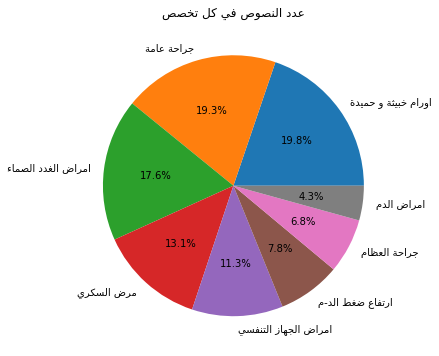

In [ ]:
counts = train['label'].value_counts()

# رسم الرسم البياني الدائري
plt.figure(figsize=(10, 6))
labels = [get_display(arabic_reshaper.reshape(label)) for label in counts.index]
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title(get_display(arabic_reshaper.reshape('عدد النصوص في كل تخصص')))
plt.show()

## [2.2]

In [10]:
from nltk.tokenize import TweetTokenizer
import re

def is_link(token):
    return token.startswith("https://") or token.startswith("http://") or token.startswith("https-") or token.startswith("http-")

# Define the process_text function
def process_text(text, link_checker):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)

    split_tokens = []
    for token in tokens:
        if not link_checker(token):
            split_tokens.extend(re.split(r'[-/]', token))
        else:
            split_tokens.append(token)

    processed_tokens = [token for token in split_tokens if token]
    return processed_tokens

text = "/اسئلة-طبية/جراحة-العظام/https-drivegooglecom-open-id-B-CozhNKZXsXJvcEpITllsZDQ-authuser"
processed_tokens = process_text(text, is_link)
print(processed_tokens)

# Apply the code to the training data
train['question_tokens'] = train['question'].apply(lambda x: process_text(x, is_link))
train['answer_tokens'] = train['answer'].apply(lambda x: process_text(x, is_link))

# Display the processed data
train[['question', 'question_tokens', 'answer', 'answer_tokens']].head()

# Calculate total and unique words in the training data
all_words_train = [word for tokens in train['question_tokens'] for word in tokens]
all_words_train += [word for tokens in train['answer_tokens'] for word in tokens]

tokens_total_train = len(all_words_train)
vocab_train = len(Counter(all_words_train))

print(f"Total words in training data: {tokens_total_train}")
print(f"Unique words in training data: {vocab_train}")


['اسئلة', 'طبية', 'جراحة', 'العظام', 'https-drivegooglecom-open-id-B-CozhNKZXsXJvcEpITllsZDQ-authuser']
Total words in training data: 2877133
Unique words in training data: 134925


## [2.3]

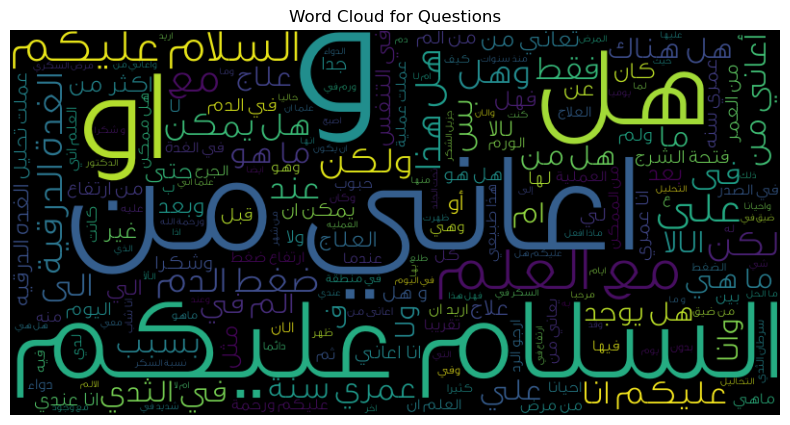

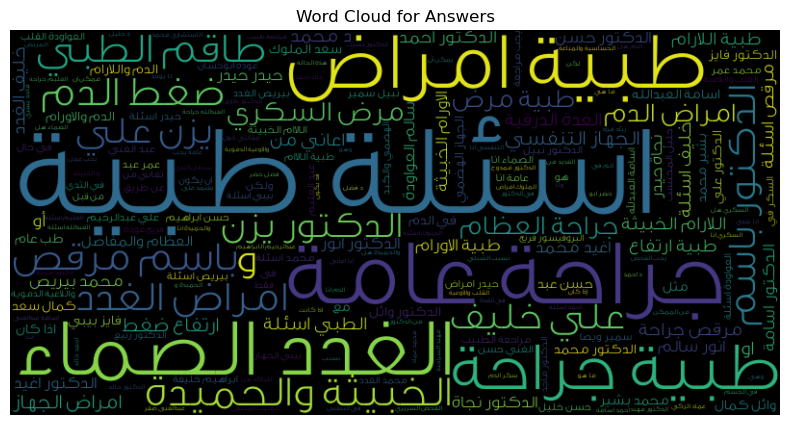

In [ ]:

# دمج جميع الكلمات في الأسئلة
all_question_words = ' '.join([' '.join(tokens) for tokens in train['question_tokens']])
# دمج جميع الكلمات في الأجوبة
all_answer_words = ' '.join([' '.join(tokens) for tokens in train['answer_tokens']])

# تحويل النص إلى شكل مناسب للغة العربية
reshaped_question_text = reshape(all_question_words)
bidi_question_text = get_display(reshaped_question_text)

reshaped_answer_text = reshape(all_answer_words)
bidi_answer_text = get_display(reshaped_answer_text)

# إنشاء Word Cloud للأسئلة
question_wordcloud = WordCloud(font_path='font.otf', width=800, height=400).generate(bidi_question_text)

# إنشاء Word Cloud للأجوبة
answer_wordcloud = WordCloud(font_path='font.otf', width=800, height=400).generate(bidi_answer_text)

# عرض Word Cloud للأسئلة
plt.figure(figsize=(10, 5))
plt.imshow(question_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Questions')
plt.axis('off')
plt.show()

# عرض Word Cloud للأجوبة
plt.figure(figsize=(10, 5))
plt.imshow(answer_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Answers')
plt.axis('off')
plt.show()

قمنا بالبداية بمحاولة إنشاء الرسم لكامل مجموعة التدريب، لكن الأمر أخذ وقتاً طويلً جداً لأن حجم البيانات كبير جداً. كما وجدنا أنه من الأفضل أن نقوم بفصل الرسمة إلى رسمتين، وإنشاء واحدة للأسئلة وأخرى للأجوبة ، حيث أن هذا الفصل سوف يساعدنا أكثر في معالجة الكلمات المكررة كثيراً لكنها غير ذات معنى.
 نجد في كلا الرسمتين، وجود كلمات وعبارات مكررة كثيراً وبأكثر من شكل أحياناً؛ لكنها لا تحمل معلومات مهمة ومفيدة طبياً، مثل:(السلام عليكم، و ، او ... إلخ)
 حصلنا على كلمات وعبارات يمكننا إزالتها في مرحلة تنظيف وتجهيز البيانات، حيث أن إزالتها سوف يخفف حجم البيانات التي سنعالجها ، بشكل جيد.كما ظهرت في الأجوبة أسماء بعض الأطباء الذين يبدو أنهم مهمين، وظهرت أيضاً بعض الأخطاء الإملائية التي يكررها الأشخاص.

## [2.4]

In [ ]:

def analyze_text(tokens):
    # حساب تكرار الكلمات
    freq_dist = FreqDist(tokens)

    # أكثر 15 كلمة مكررة في النص
    most_common_15 = freq_dist.most_common(15)

    # الكلمات التي تظهر مرة واحدة فقط في النص
    hapaxes = freq_dist.hapaxes()

    # 10 من الكلمات الأقل تكرارًا
    least_common_10 = sorted(freq_dist.items(), key=itemgetter(1))[:10]

    # أكثر 10 ثنائيات كلمات مكررة في النص
    bigram_freq_dist = FreqDist(bigrams(tokens))
    most_common_bigrams_10 = bigram_freq_dist.most_common(10)

    # أكثر 10 ثالثيات كلمات مكررة في النص
    trigram_freq_dist = FreqDist(trigrams(tokens))
    most_common_trigrams_10 = trigram_freq_dist.most_common(10)

    # أكثر 10 ثنائيات كلمات مهمة في النص
    bigram_measures = collocations.BigramAssocMeasures()
    bigram_finder = collocations.BigramCollocationFinder.from_words(tokens)
    top_10_bigram_collocations = bigram_finder.nbest(bigram_measures.pmi, 10)

    # أكثر 10 ثالثيات كلمات مهمة في النص
    trigram_measures = collocations.TrigramAssocMeasures()
    trigram_finder = collocations.TrigramCollocationFinder.from_words(tokens)
    top_10_trigram_collocations = trigram_finder.nbest(trigram_measures.pmi, 10)

    return {
        'most_common_15': most_common_15,
       # 'hapaxes': hapaxes,
        'least_common_10': least_common_10,
        'most_common_bigrams_10': most_common_bigrams_10,
        'most_common_trigrams_10': most_common_trigrams_10,
        'top_10_bigram_collocations': top_10_bigram_collocations,
        'top_10_trigram_collocations': top_10_trigram_collocations,
    }

# تطبيق التحليل على البيانات كاملة
#all_analysis = analyze_text(all_words)
#print('All data analysis:', all_analysis)

# لطباعة النتائج بشكل منفصل و واضح
def print_analysis(analysis):
    print('Most common 15 words:')
    for word, frequency in analysis['most_common_15']:
        print(f'{word}: {frequency}')
    print('\n')

    print('Least common 10 words:')
    for word, frequency in analysis['least_common_10']:
        print(f'{word}: {frequency}')
    print('\n')

    print('Most common 10 bigrams:')
    for bigram, frequency in analysis['most_common_bigrams_10']:
        print(f'{bigram}: {frequency}')
    print('\n')

    print('Most common 10 trigrams:')
    for trigram, frequency in analysis['most_common_trigrams_10']:
        print(f'{trigram}: {frequency}')
    print('\n')

    print('Top 10 bigram collocations:')
    for bigram in analysis['top_10_bigram_collocations']:
        print(bigram)
    print('\n')

    print('Top 10 trigram collocations:')
    for trigram in analysis['top_10_trigram_collocations']:
        print(trigram)
    print('\n')

# تطبيق التحليل على البيانات كاملة
all_analysis = analyze_text(all_words)

# طباعة النتائج
print_analysis(all_analysis)

# قائمة الاختصاصات
specialties = ['اورام خبيثة و حميدة', 'جراحة عامة', 'ارتفاع ضغط الد-م', 'جراحة العظام', 'امراض الدم', 'امراض الجهاز التنفسي', 'مرض السكري', 'امراض الغدد الصماء']

# تطبيق التحليل على كل اختصاص
for specialty in specialties:
    # اختيار البيانات لهذا الاختصاص
    specialty_data = train[train['label'] == specialty]

     # دمج جميع الكلمات في الأسئلة والأجوبة
    all_words = (specialty_data['question_tokens'] + specialty_data['answer_tokens']).explode()

    # تطبيق التحليل
    analysis = analyze_text(all_words)

    # طباعة النتائج
    print(f'Analysis for {specialty}:')
    print_analysis(analysis)

Most common 15 words:
من: 53731
في: 47548
الدكتور: 44651
طبية: 32856
اسئلة: 32618
و: 27315
جراحة: 20023
هل: 19844
الدم: 18946
على: 17807
امراض: 14809
عامة: 14630
لا: 13177
الغدد: 12601
مع: 12047


Least common 10 words:
سنتينTT: 1
مستحمل: 1
سابقنا: 1
استصئاله: 1
الاطلع: 1
بحثث: 1
التنمر: 1
والعيد: 1
وسأكون: 1
لاساعدعلى: 1


Most common 10 bigrams:
('اسئلة', 'طبية'): 32598
('جراحة', 'عامة'): 14448
('الغدد', 'الصماء'): 11130
('طبية', 'امراض'): 10883
('طبية', 'جراحة'): 8607
('ضغط', 'الدم'): 6735
('اعاني', 'من'): 6247
('الاورام', 'الخبيثة'): 6106
('الخبيثة', 'والحميدة'): 6091
('طبية', 'الاورام'): 6089


Most common 10 trigrams:
('اسئلة', 'طبية', 'امراض'): 10883
('اسئلة', 'طبية', 'جراحة'): 8607
('اسئلة', 'طبية', 'الاورام'): 6089
('طبية', 'الاورام', 'الخبيثة'): 6089
('الاورام', 'الخبيثة', 'والحميدة'): 6089
('طبية', 'جراحة', 'عامة'): 6085
('امراض', 'الغدد', 'الصماء'): 5614
('طبية', 'امراض', 'الغدد'): 5607
('الدكتور', 'باسم', 'مرقص'): 5414
('الدكتور', 'يزن', 'علي'): 5296


Top 10 bigram colloc


الثنائيات المهمة:

 BigramCollocationFinder باستخدام from_words(tokens) حيث tokens هي قائمة الكلمات.
يُستخدم BigramAssocMeasures لتحديد مقدار أهمية الثنائيات. في هذا السياق، يُستخدم قياس ارتباط الثنائيات باستخدام pmi (Pointwise Mutual Information).
يُستخدم nbest لاسترجاع أعلى 10 ثنائيات كلمات مهمة استنادًا إلى قياس ارتباط الثنائيات.

الثلاثيات المهمة:

 TrigramCollocationFinder بنفس الطريقة باستخدام from_words(tokens) حيث tokens هي قائمة الكلمات.
يُستخدم TrigramAssocMeasures لتحديد مقدار أهمية الثلاثيات باستخدام pmi
يُستخدم nbest لاسترجاع أعلى 10 ثلاثيات كلمات مهمة استنادًا إلى قياس ارتباط الثلاثيات.


## [2.5]

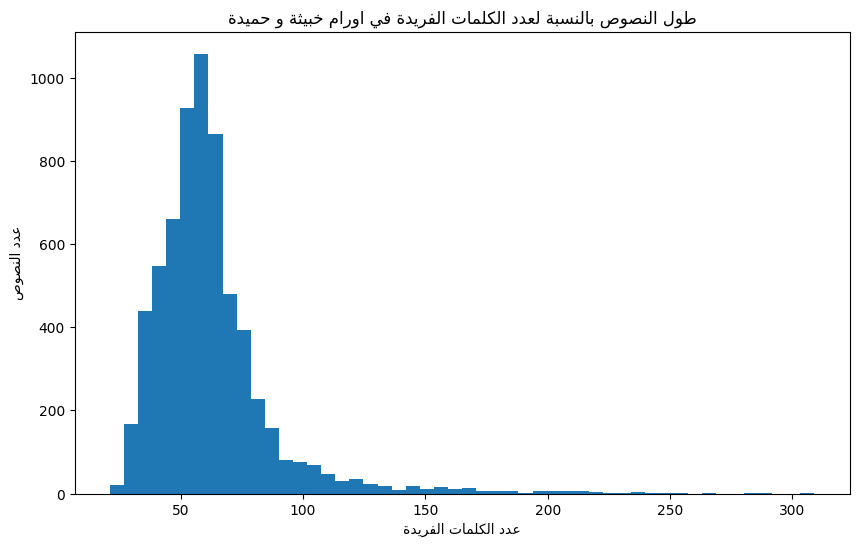

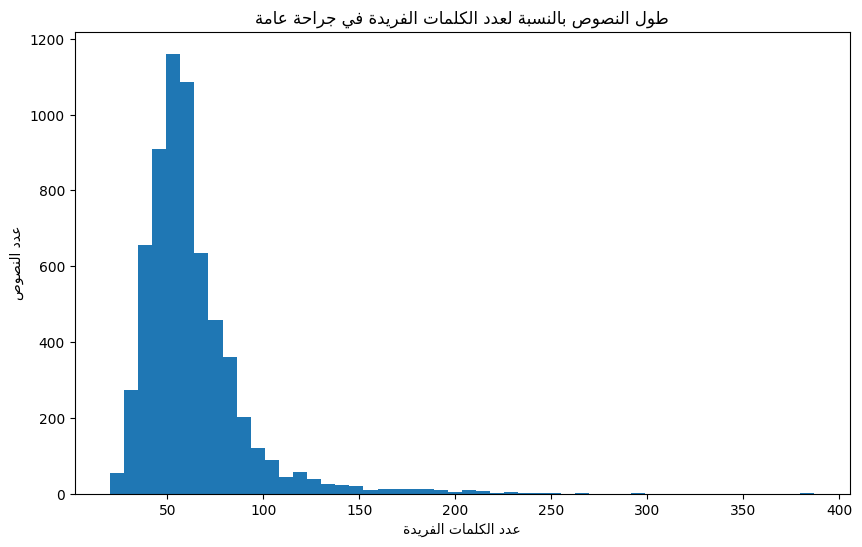

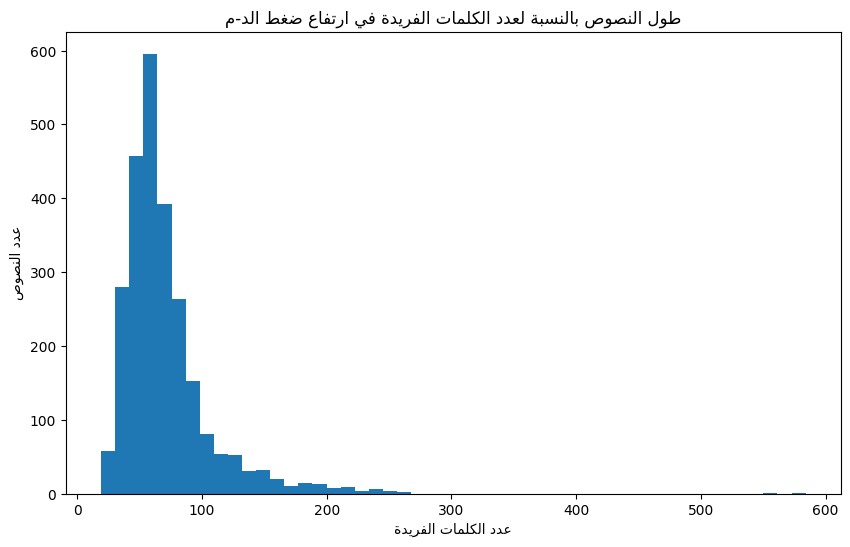

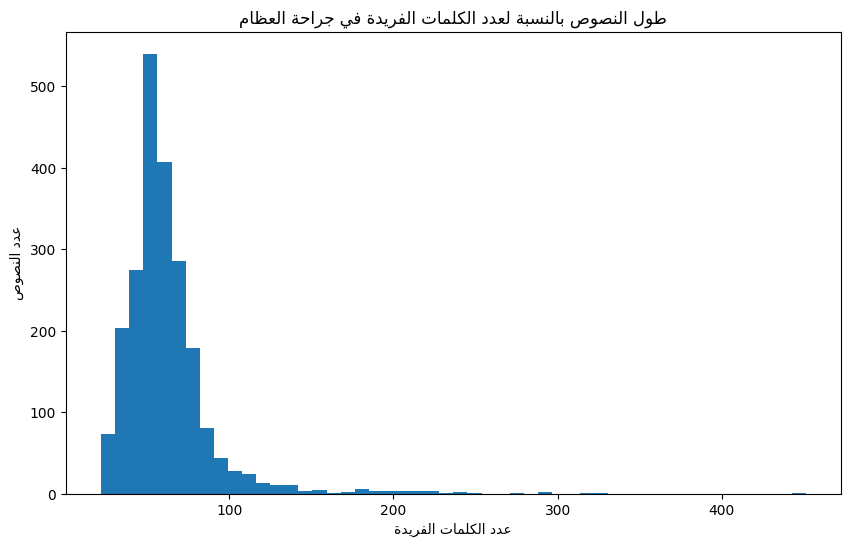

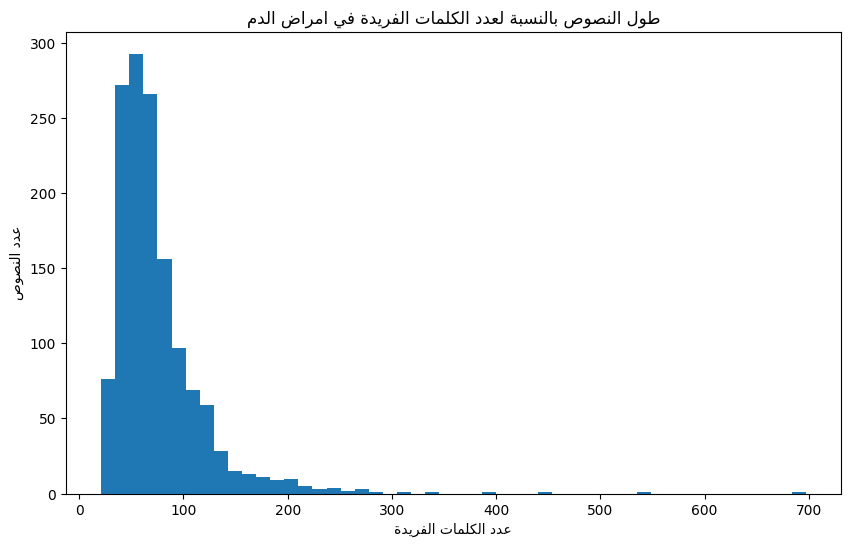

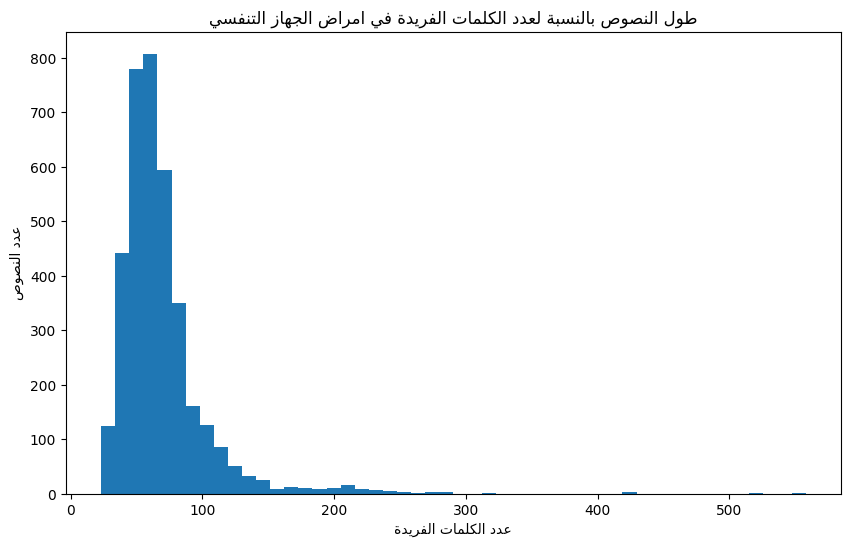

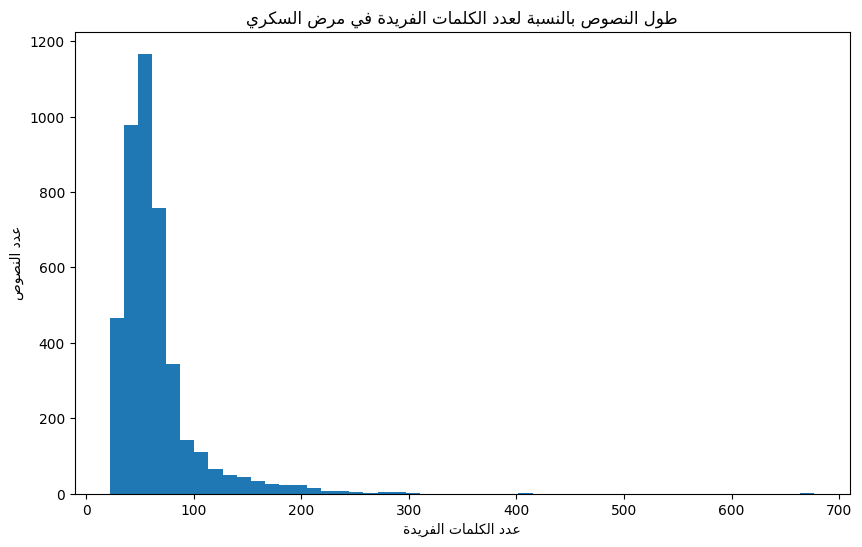

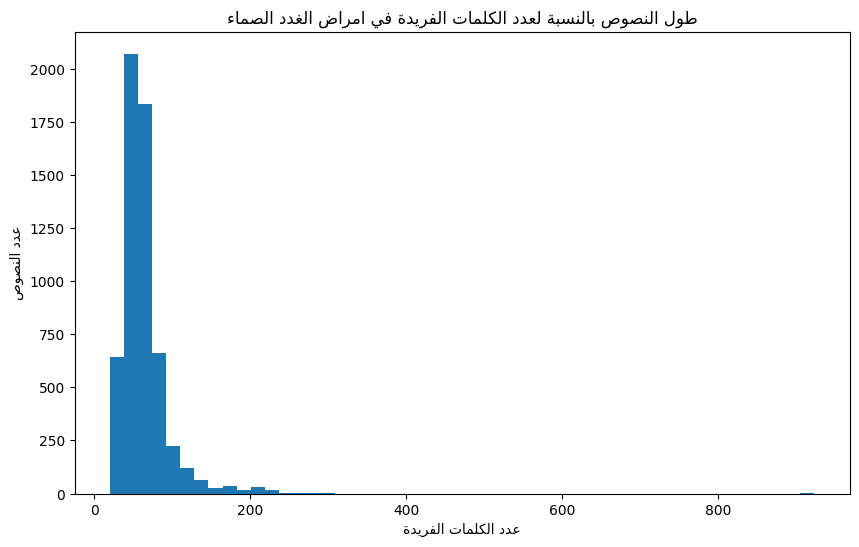

In [ ]:
# تطبيق التحليل على كل اختصاص
for specialty in specialties:
    # اختيار البيانات لهذا الاختصاص
    specialty_data = train[train['label'] == specialty]

    # دمج كل سؤال مع جوابه وتقطيع النص إلى كلمات
    all_words = specialty_data.apply(lambda x: x['question_tokens'] + x['answer_tokens'], axis=1)

    # حساب طول النصوص بالنسبة لعدد الكلمات الفريدة في كل سؤال مدمج مع الإجابة
    lengths = all_words.apply(lambda x: len(set(x)))

    # رسم الرسم البياني
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=50)
    plt.title(get_display(arabic_reshaper.reshape(f'طول النصوص بالنسبة لعدد الكلمات الفريدة في {specialty}')))
    plt.xlabel(get_display(arabic_reshaper.reshape('عدد الكلمات الفريدة')))
    plt.ylabel(get_display(arabic_reshaper.reshape('عدد النصوص')))
    plt.show()



# Question [3]: Text Cleaning and Normalization

## [3.1]


In [ ]:
import re

def remove_links(text):
    # يزيل الروابط بدون www وتنتهي بـ .com ولا يشمل gmail
    if isinstance(text, str):
        pattern = r"\b(?!gmail\.com)(?:https?://)?(?:www\.)?\S+\.com\b"
        cleaned_text = re.sub(pattern, "", text)
        return cleaned_text
    else:
        return text





## [3.2]

In [ ]:
import re

def replace_doctor_names(text):
    # يحلل الأطباء بتركيب "الدكتور اسم اسم" ويستبدله بالاختصار "د. اسم"
    pattern = r"الدكتور ([^\s]+) ([^\s]+)"
    replacement = r"د. \1"
    cleaned_text = re.sub(pattern, replacement, text)
    return cleaned_text



## [3.3]

In [ ]:
import re

def remove_doctor_specialty(text):
    # يحلل اختصاص الطبيب بعد الاسم ويحذفه
    pattern = r"د\. ([^\s]+) (.+)$"
    replacement = r"د. \1"
    cleaned_text = re.sub(pattern, replacement, text)
    return cleaned_text


## [3.4]

In [ ]:
import pandas as pd
import re


def remove_duplicates_replace(text):
    # يستبدل التكرار بحرف واحد فقط
    pattern = re.compile(r"(\S)(\1{2,})")
    replacement = r"\1"
    if isinstance(text, str):
        cleaned_text = re.sub(pattern, replacement, text)
        return cleaned_text
    else:
        return text


def clean_and_remove_duplicates(df):
    # حذف التكرار واستبداله بحرف واحد في الأسئلة
    df['question'] = df['question'].apply(remove_duplicates_replace)
    # حذف التكرار واستبداله بحرف واحد في الإجابات
    df['answer'] = df['answer'].apply(remove_duplicates_replace)
    return df


## [3.5]

### [3.5.1]

In [ ]:
import re

def unify_numerals(text):
    replacements = {
      '١': '1',
      '٢': '2',
      '٣': '3',
      '٤': '4',
      '٥': '5',
      '٦': '6',
      '٧': '7',
      '٨': '8',
      '٩': '9',

    }

    for key, value in replacements.items():
        text = re.sub(key, value, text)

    return text

def clean_text(df_column):

    df_column = df_column.apply(unify_numerals)


    return df_column

# تنظيف مجموعة الاختبار
test['question'] = clean_text(test['question'])
test['answer'] = clean_text(test['answer'])

# تنظيف مجموعة التدريب
train['question'] = clean_text(train['question'])
train['answer'] = clean_text(train['answer'])
print(train['question'].head((20)))
print(train['answer'].head((20)))
# تنظيف مجموعة التحقق
val['question'] = clean_text(val['question'])
val['answer'] = clean_text(val['answer'])



0     \nما هي مميزات و عيوب الدواء جلوكوفانس ### # و...
1     \nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...
2                 \nحلول منزلية لأعراض ارتفاع ضغط الدم 
3     \nعملت عملية دوالي الساقين قسطرة الليزر من شهر...
4     \nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...
5     \nالسلام عليكم انا شاب ## سنه وظهرلي زي كوره م...
6     \nورمه قبل ثلاث سنوات كان حجمها # انش ولاكن فج...
7     \nعملت عن البواسير منذ شهر وعانيت خلال التبرز ...
8     \nبالله عليكم امي اجريت عملية جراحية على فخذها...
9     \nهل المشي بعد الأكل مباشرةً لمدة نصف ساعة مضر...
10    \nلدي جرح فوق حاجبي ، و تمت عملية الخياطة ، ثم...
11    \nاعاني سابقناًمن ورم خبيث في الثدي والان راجع...
12                  \nما هي الفحوص الروتينية للسكريين؟ 
13    \nحدث معي قبل سنة أو شيء كهذا تنميل في الوجه و...
14    \nلدي تضخم في الثدي الايسر من دون الم منذ ثلاث...
15    \nالسلام عليكم ورحمة الله،أنت ذكر عمري ## أعان...
16    \nنحول ومغص متقطع الم فضيع أثناء السعال والعطا...
17    \nانا بنت ابلغ من العمر ##سنة و لدي مشكلة 

### [3.5.2]

In [13]:
import re

def replace_numbers_with_symbol(text, symbol='#'):
    if isinstance(text, str):
        # يستخدم \d للتطابق مع أي رقم
        pattern = r'\d'
        # يستبدل الأرقام بالرمز المحدد
        cleaned_text = re.sub(pattern, symbol, text)
        return cleaned_text
    else:
        return text

# استخدام الدالة على بيانات الاختبار
test['question'] = test['question'].apply(replace_numbers_with_symbol)
test['answer'] = test['answer'].apply(replace_numbers_with_symbol)
print(test['question'].head((5)))
print(test['answer'].head((5)))

# استخدام الدالة على بيانات التدريب
train['question'] = train['question'].apply(replace_numbers_with_symbol)
train['answer'] = train['answer'].apply(replace_numbers_with_symbol)

# استخدام الدالة على بيانات التحقق
val['question'] = val['question'].apply(replace_numbers_with_symbol)
val['answer'] = val['answer'].apply(replace_numbers_with_symbol)



0    \nعندي الم مستمر داخل الشرج لا يوجد تشقق ولا ن...
1    \nهل يمكن لثوم ان يخفض من الضغظ وماهي الجرعه ا...
2    \nعملت فحص سكر الصائم بعد صيام اكثر من ##ساعة\...
3    \nعملت ماموجرام وموجات فوق صوتيه فوجدت تضخم فى...
4    \nقبل ثلاثة أسابيع أصبت بالتهابات القصبات الهو...
Name: question, dtype: object
0    \n\nاخي الكريم استخدم أقراص مضادة للالتهاب Pon...
1    \n\nنعم يمكن وهناك كثير من الدراسات التي تؤكد ...
2    \n\nالنتيجة طبيعية\n#\n####-##-## ##:##:##\n\n...
3    \n\nيفضل طبعا عمل رنين لانه ادق بكثير لمعرفه ه...
4    \n\nالعودة والكشف عند الطبيب لمعرفة اثار المرض...
Name: answer, dtype: object


In [ ]:
import re

def replace_numbers_except_datetime(text, symbol='#'):
    # يحدد نمطًا عامًا للأرقام
    general_number_pattern = r'\d+'

    # يستخدم تعبيرًا منتظمًا لاستبدال الأرقام بالرمز "#" باستثناء التواريخ والأوقات
    def replace_numbers(match):
        return symbol if match.group() not in re.findall(datetime_pattern, match.group()) else match.group()

    # يستبدل الأرقام بالرمز "#" باستثناء التواريخ والأوقات
    cleaned_text = re.sub(general_number_pattern, replace_numbers, text)
    return cleaned_text

# استخدام الدالة على بيانات الاختبار
test['question'] = test['question'].apply(replace_numbers_except_datetime)
test['answer'] = test['answer'].apply(replace_numbers_except_datetime)

# استخدام الدالة على بيانات التدريب
train['question'] = train['question'].apply(replace_numbers_except_datetime)
train['answer'] = train['answer'].apply(replace_numbers_except_datetime)

# استخدام الدالة على بيانات التحقق
val['question'] = val['question'].apply(replace_numbers_except_datetime)
val['answer'] = val['answer'].apply(replace_numbers_except_datetime)

print(test['answer'].head((20)))

0     \n\nاخي الكريم استخدم أقراص مضادة للالتهاب Pon...
1     \n\nنعم يمكن وهناك كثير من الدراسات التي تؤكد ...
2     \n\nالنتيجة طبيعية\n#\n####-##-## ##:##:##\n\n...
3     \n\nيفضل طبعا عمل رنين لانه ادق بكثير لمعرفه ه...
4     \n\nالعودة والكشف عند الطبيب لمعرفة اثار المرض...
5     \n\nظهور السكر بالبول متوقع في الحمل الطبيعي و...
6     \n\nالافضل مراجعة طبيبك الذي اجرى الجراحة للتق...
7     \n\nممكن التوقف عنها مرة واحدة ولكن يفضل بالتن...
8     \n\nراجع جراحك ولا خوف\n#\n####-##-## ##:##:##...
10    \n\nالالم عادي بعد الجراحة. يتحسن تدريجيا\n#\n...
11    \n\nغالبا هذا شق شرجي و الاعراض المحسوسة بسببه...
12    \n\nلابد أن تعرض حالته على طبيب أطفال لاحتمال ...
13    \n\nتختلف الإجابة على هذا السؤال باختلاف المقص...
14    \n\nمرهم تيراميسين. للعين فقط\n#\n####-##-## #...
15    \n\nالسلام عليكماين الاشعات والتحاليل ، انها غ...
16    \n\nيجب الفحص بواسطه متخصص فى جراحة العظام و ع...
17    \n\nالنتيجة طبيعية\n#\n####-##-## ##:##:##\n\n...
18    \n\nسلامتك ان شاء الله , قد يكون طبيعي بنق

### [3.5.3]

In [ ]:
import re

def replace_numbers_with_hashtag(text):
    # يحدد نمطًا عامًا للأرقام
    general_number_pattern = r'\#'

    # يحذف جميع الأرقام من النص
    text_without_numbers = re.sub(general_number_pattern, '', text)

    return text_without_numbers

# استبدال الأرقام برمز # في بيانات الاختبار
test['question'] =test['question'].apply(replace_numbers_with_hashtag)
test['answer'] =test['answer'].apply(replace_numbers_with_hashtag)

# استبدال الأرقام برمز # في بيانات التدريب
train['question'] = train['question'].apply(replace_numbers_with_hashtag)
train['answer'] = train['answer'].apply(replace_numbers_with_hashtag)

# استبدال الأرقام برمز # في بيانات التحقق
val['question'] = val['question'].apply(replace_numbers_with_hashtag)
val['answer'] =val['answer'].apply(replace_numbers_with_hashtag)


print(test['question'].head((20)))
print(test['answer'].head((20)))

0     \nعندي الم مستمر داخل الشرج لا يوجد تشقق ولا ن...
1     \nهل يمكن لثوم ان يخفض من الضغظ وماهي الجرعه ا...
2     \nعملت فحص سكر الصائم بعد صيام اكثر من ساعة\nو...
3     \nعملت ماموجرام وموجات فوق صوتيه فوجدت تضخم فى...
4     \nقبل ثلاثة أسابيع أصبت بالتهابات القصبات الهو...
5     \nعملت تحليل دم في الاسبوع  وخبرتني الدكتورة ا...
6     \nاجرية عملية ناسور شرجي قبل اشهر و لا زال يخر...
7     \nكيف التوقف عن اخذ جرعات الثايروكسين ان كانت ...
8     \nالسلام عليكم . يوجد لسع والم وتحجر وورم فى ث...
10    \nالسلام عليكم. كان عندي شرخ مزمن وفي الاسبوع ...
11    \nفي الشرج وعند المشي او الحركه تزيد الحكه وال...
12    \nلديه اعراض تتمتل في مشكلة في التنفس عبارة عن...
13                 \nهل بخار التنفس مفيد او مضر للحامل 
14    \nلدي جرح فوق حاجبي ، و تمت عملية الخياطة ، ثم...
15    \nمريض عمره  سنة شعر بضيق تنفس وتم عمل الايكو ...
16    \nالسلام عليكم / ألم وتعلق الركبه لا أستطيع ثن...
17    \nعملت فحص سكر الصائم بعد صيام اكثر من ساعة\nو...
18    \nاعاني من دوخه ونسبه السكر من  الى  بشكل 

### [3.5.4]

In [ ]:
import re

def remove_date_time_symbols(text):
    # يستخدم تعبيرًا منتظمًا للتعرف على التاريخ والوقت
    date_time_pattern = r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}'

    # يحذف الرموز "::" و "--" من التاريخ والوقت
    text_cleaned = re.sub(r'(::|--)', '', text)

    # يحذف التاريخ والوقت من النص
    text_without_date_time = re.sub(date_time_pattern, '', text_cleaned)

    return text_without_date_time

# حذف التاريخ والوقت والرموز من إجابات الاختبار
test['answer'] =test['answer'].apply(remove_date_time_symbols)

# حذف التاريخ والوقت والرموز من إجابات التدريب
train['answer'] = train['answer'].apply(remove_date_time_symbols)

# حذف التاريخ والوقت والرموز من إجابات التحقق
val['answer'] = val['answer'].apply(remove_date_time_symbols)


print(test['answer'].head((20)))

0     \n\nاخي الكريم استخدم أقراص مضادة للالتهاب Pon...
1     \n\nنعم يمكن وهناك كثير من الدراسات التي تؤكد ...
2     \n\nالنتيجة طبيعية\n\n \n\n\nالدكتور اغيد محمد...
3     \n\nيفضل طبعا عمل رنين لانه ادق بكثير لمعرفه ه...
4     \n\nالعودة والكشف عند الطبيب لمعرفة اثار المرض...
5     \n\nظهور السكر بالبول متوقع في الحمل الطبيعي و...
6     \n\nالافضل مراجعة طبيبك الذي اجرى الجراحة للتق...
7     \n\nممكن التوقف عنها مرة واحدة ولكن يفضل بالتن...
8     \n\nراجع جراحك ولا خوف\n\n \n\n\nالدكتور حسن ا...
10    \n\nالالم عادي بعد الجراحة. يتحسن تدريجيا\n\n ...
11    \n\nغالبا هذا شق شرجي و الاعراض المحسوسة بسببه...
12    \n\nلابد أن تعرض حالته على طبيب أطفال لاحتمال ...
13    \n\nتختلف الإجابة على هذا السؤال باختلاف المقص...
14    \n\nمرهم تيراميسين. للعين فقط\n\n \n\n\nالدكتو...
15    \n\nالسلام عليكماين الاشعات والتحاليل ، انها غ...
16    \n\nيجب الفحص بواسطه متخصص فى جراحة العظام و ع...
17    \n\nالنتيجة طبيعية\n\n \n\n\nالدكتور اغيد محمد...
18    \n\nسلامتك ان شاء الله , قد يكون طبيعي بنق

## [3.6]

### [3.6.1]

In [14]:
def remove_punctuation(text):
    # التحقق مما إذا كان النص فعلاً من نوع string
    if isinstance(text, str):
        cleaned_text = re.sub(r'([^\w\s])', '', text)
        return cleaned_text
    else:
        return text
# Example
input_text = "لقمة طيبه ،، اسعار جيدة ،بس ما في nopمطرح دايما للصفةmm،وفي، 1ضغط اخر الاسبوع.."
output_text = remove_punctuation(input_text)
print(output_text)

لقمة طيبه  اسعار جيدة بس ما في nopمطرح دايما للصفةmmوفي 1ضغط اخر الاسبوع


### [3.6.2]

In [15]:
def remove_characters(text):
    if isinstance(text, str):
        cleaned_text = re.sub(r'[^ء-ي0-9.،,;?!%:"\'(){}\[\]<> ]', '', text)
        return cleaned_text
    else:
        return text


# Example
input_text = "لقمة طيبه ،، اسعار جيدة ،بس ما في nopمطرح دايما للصفةmm،وفي، 1ضغط اخر الاسبوع.."
output_text = remove_characters(input_text)
print(output_text)


لقمة طيبه ،، اسعار جيدة ،بس ما في مطرح دايما للصفة،وفي، 1ضغط اخر الاسبوع..


## [3.7]

In [ ]:

import nltk
from nltk.corpus import stopwords
import re

# Download the stopwords list for Arabic
nltk.download('stopwords')

# Use stopwords.words to get a list of stopwords for Arabic
stopwords_arabic = set(stopwords.words('arabic'))

# Words to be excluded from removal
excluded_words = {'لا', 'نعم', 'غير', 'قبل', 'بعد'}



# Combine stopwords with excluded words
stopwords_arabic = stopwords_arabic.difference(excluded_words)



def remove_stopwords(text):
    # التحقق مما إذا كان النص فعلاً من نوع string
    if isinstance(text, str):
        # Split the text into words
        words = re.findall(r'\b\w+\b', text)

        # Remove stopwords from the text, excluding specific words
        text_without_stopwords = ' '.join([word for word in words if word.lower() not in stopwords_arabic])

        return text_without_stopwords
    else:
        return text
# Test the function with a sample text
text = "This is an example. إقرأ المزيد, أرجو, إقرأ, أرجو الرد. لا, نعم, غير, قبل, بعد"
text_without_stopwords = remove_stopwords(text)
print(text_without_stopwords)


This is an example إقرأ المزيد أرجو إقرأ أرجو الرد لا نعم غير قبل بعد


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_sentences_with_two_words(text, word1, word2):
    # Define the pattern for sentences with two specific words
    pattern = re.compile(fr'\b(?:{word1}\W+{word2}|{word2}\W+{word1})\b', flags=re.IGNORECASE)

    # Use the pattern to find and replace matching sentences
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

# Test the function with a sample text
text = "This is an example. إقرأ المزيد, أرجو, إقرأ, أرجو الرد. لا, نعم, غير, قبل, بعد"
word1 = "إقرأ"
word2 = "المزيد"
word3 = "أرجو"
word4 = "الرد"

cleaned_text = remove_sentences_with_two_words(text, word1, word2)
cleaned_text = remove_sentences_with_two_words(cleaned_text, word3, word4)
print(cleaned_text)


This is an example. , أرجو, إقرأ, . لا, نعم, غير, قبل, بعد


## [3.8]

In [ ]:
import re

def arabic_stemmer(word):
    # Define a regex pattern to capture possible roots
    pattern = re.compile(r'^(.*?)(?:ون|ان|ين|ات|وا|يا|هم|هن|كم|نا|ها|كن|ني|هما|نا|تما|كما|نا)$', flags=re.IGNORECASE)

    # Use the pattern to find the root
    match = re.match(pattern, word)

    # If a match is found, return the root, otherwise return the original word
    return match.group(1) if match else word

def stem_arabic_text(text):
    # Remove "الـ" from the beginning of words
    text = re.sub(r'\bال(\w+)\b', r'\1', text)

    # Define a regex pattern to find words in the text
    word_pattern = re.compile(r'\b\w+\b')

    # Use findall to get all words in the text
    words = re.findall(word_pattern, text)

    # Apply the arabic_stemmer function to each word
    stemmed_words = [arabic_stemmer(word) for word in words]

    # Join the stemmed words into a single string
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

# Test the function with a sample text
text = "تعلمون عملنا الحديقة"
stemmed_text = stem_arabic_text(text)
print(stemmed_text)


تعلم عمل حديقة


## [3.9]

### [3.9.1]

In [16]:
def unify_hamza(text):
    # التحقق مما إذا كان النص فعلاً من نوع string
    if isinstance(text, str):
        cleaned_text = re.sub(r'[ئؤ]', 'ء', text)
        return cleaned_text
    else:
        return text

# Test the function with a sample text
text = "سماء بؤبؤ بيئة قراءة بيئئات"
unified_text = unify_hamza(text)
print(unified_text)


سماء بءبء بيءة قراءة بيءءات


### [3.9.2]

In [ ]:
def unify_alef(text):
    # Replace أ and آ and إ with ا
    text = re.sub(r'[أإآ]', 'ا', text)

    return text

# Test the function with a sample text
text = "اقرأ,إيمان,آية,إحسان"
unified_text = unify_alef(text)
print(unified_text)


اقرا,ايمان,اية,احسان


### [3.9.3]

In [17]:

def remove_duplicate_letters(text):
    # Remove duplicated letters
    if isinstance(text, str):
        cleaned_text = re.sub(r'(.)\1+', r'\1', text)
        return cleaned_text
    else:
        return text

# Test the function with a sample text
text = "التطـــــــــــــــــــــــــويل"
text_cleaned = remove_duplicate_letters(text)
print(text_cleaned)


التطـويل


### [3.9.4]

In [18]:
def remove_tashkeel(text):
    # Remove Arabic diacritics (tashkeel)
    if isinstance(text, str):
        text_without_tashkeel = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)
        return text_without_tashkeel
    else:
        return text

# Test the function with a sample text
text = "هًذَا النَصُ مُحَتَوَيٌ عَلَىٍ حٍرُوٌفً التَّشْكِيل"
text_without_tashkeel = remove_tashkeel(text)
print(text_without_tashkeel)


هذا النص محتوي على حروف التشكيل


## [3.10]

In [19]:

def remove_duplicate_spaces(text):
    # Remove duplicate spaces between words
    if isinstance(text, str):
        cleaned_text = re.sub(r'\s+', ' ', text)
        return cleaned_text
    else:
        return text

# Test the function with a sample text
text = "حذف       الفراغات    المتكررة"
text_cleaned = remove_duplicate_spaces(text)
print(text_cleaned)


حذف الفراغات المتكررة


## Extra [3.11]

# Question [4]: Prepare Training Data

## [4.1]


In [20]:
import pandas as pd


def process_data(data, functions, columns):
    # نسخ البيانات لتجنب التلاعب بالأصلية
    processed_data = data.copy()

    for col in columns:
        # تحديد نوع البيانات للعمود
        processed_data[col] = processed_data[col].astype(str)

        for func in functions:
            processed_data[col] = processed_data[col].apply(func)

    return processed_data


train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")
test = pd.read_csv("test.csv")

# قائمة الدوال بالترتيب المطلوب
ordered_functions = [remove_punctuation, remove_stopwords,remove_duplicates_replace,remove_characters,replace_numbers_with_symbol,remove_duplicate_letters,remove_tashkeel,remove_duplicate_spaces]

# قائمة الأعمدة التي تريد تطبيق الدوال عليها (question و answer في هذه الحالة)
target_columns = ['question', 'answer']

# معالجة البيانات باستخدام الدوال على الأعمدة المحددة
processed_train_data = process_data(train, ordered_functions, target_columns)
processed_test_data = process_data(test, ordered_functions, target_columns)
processed_val_data = process_data(val, ordered_functions, target_columns)

# عرض البيانات المعالجة
processed_train_data.head()

,question,answer,label
0,ميزات عيوب الدواء جلوكوفانس # # ايضا الأنسولين...,لكل علاج ايجابيته وسلبياته والتي تعتمد حالة ال...,الدم
1,اليك نتيجة تحليل هرمونات الغدة الدرقية علما با...,نعم يجب تخفيض الجرعة الا اذا سب استئصال الغدة ...,الاورام-الخبيثة-والحميدة
2,حلول منزلية لأعراض ارتفاع ضغط الدم,يفضل عدم الاستغناء العلاج الدوائي لمرضى الضغط ...,جراحة-عامة
3,عملت عملية دوالي الساقين قسطرة اليزر شهر وعندي...,راجع طبيبك اجري الجراحه افضل يجيب لانه شاهد ال...,أمراض-الجهاز-التنفسي
4,حقيقة ان تمرين العضلة النعلية يخفض السكر بالدم,قصدت تدليك العضلة فهذا كلام غير صحيح مارسة الر...,مرض-السكري


## [4.2]

In [ ]:
# Apply the code to the training data
processed_train_data['question_tokens'] = processed_train_data['question'].apply(lambda x: process_text(x, is_link))
processed_train_data['answer_tokens'] = processed_train_data['answer'].apply(lambda x: process_text(x, is_link))

# Display the processed data
processed_train_data[['question', 'question_tokens', 'answer', 'answer_tokens']].head()

# Calculate total and unique words in the training data
all_words_processed_train_data = [word for tokens in processed_train_data['question_tokens'] for word in tokens]
all_words_processed_train_data += [word for tokens in processed_train_data['answer_tokens'] for word in tokens]

tokens_total_processed_train_data = len(all_words_processed_train_data)
vocab_processed_train_data = len(Counter(all_words_processed_train_data))

print(f"Total words in training data: {tokens_total_processed_train_data}")
print(f"Unique words in training data: {vocab_processed_train_data}")


Total words in training data: 3245218
Unique words in training data: 118109


نلاحظ ازدياد أعداد الكلمات الكلية بعد التنظيف عن قبل التنظيف في حين هناك نقص واضح في أعداد الكلمات الفريدة بعد تنظيف بيانات التدريب حيث بلغ عددها 118109 في حين كان العدد قبل التنظيف 134925

## [4.3]

In [ ]:
 #تعريف وظيفة لفحص إذا كانت الخلية فارغة أو تحتوي على أقل من 5 حروف
def is_empty_or_short(cell):
    return pd.isnull(cell) or len(str(cell)) < 5

# اختبار كل خلية باستخدام الوظيفة
result1 = processed_train_data.applymap(is_empty_or_short)

# إظهار النتائج
print(result1)

# حذف الصفوف التي تحتوي على True (خلية فارغة أو نص قصير)
cleaned_train_data = processed_train_data[~result1.any(axis=1)]

# عرض عدد الأسطر التي تم حذفها
deleted_rows_count = len(processed_train_data) - len(cleaned_train_data)
print("عدد الأسطر المحذوفة:", deleted_rows_count)


       question  answer  label
0         False   False   True
1         False   False  False
2         False   False  False
3         False   False  False
4         False   False  False
...         ...     ...    ...
52753     False   False  False
52754     False   False  False
52755     False   False  False
52756     False   False  False
52757     False   False  False

[52758 rows x 3 columns]
عدد الأسطر المحذوفة: 324


In [ ]:
#تنظيف test , val
result2 = processed_test_data.applymap(is_empty_or_short)
cleaned_test_data = processed_test_data[~result2.any(axis=1)]
result3 = processed_val_data.applymap(is_empty_or_short)
cleaned_val_data = processed_val_data[~result3.any(axis=1)]

## [4.4]

In [ ]:
# دمج عمودي "question" و "answer" في نص واحد
train['combined_text'] = train['question'].astype(str) + ' ' + train['answer'].astype(str)

# عرض البيانات بعد الدمج
train.head()


,question,answer,label,combined_text
0,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...,\n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على...,الدم,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...
1,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...,\n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب است...,الاورام-الخبيثة-والحميدة,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...
2,\nحلول منزلية لأعراض ارتفاع ضغط الدم,\n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى...,جراحة-عامة,\nحلول منزلية لأعراض ارتفاع ضغط الدم \n\nيفضل...
3,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nراجع طبيبك من اجري الجراحه افضل من يجيب لا...,أمراض-الجهاز-التنفسي,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...
4,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...,\n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح ....,مرض-السكري,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...


# Question [5]: Baseline

The Comparison Dictionary example

In [45]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

Filling the dictionary example

In [ ]:
comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("remove links")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy_value)

## [5.1]

In [ ]:
import pandas as pd

external_test_path = 'test.csv'

# قراءة ملف الاختبار الخارجي
df_external_test = pd.read_csv(external_test_path)

# استخراج مصفوفة الدخل والتصنيفات المتوقعة
X_external_test = df_external_test[['question', 'answer']]
y_external_test = df_external_test['label']

# طباعة مصفوفة الدخل والتصنيفات المتوقعة
print("مصفوفة الدخل:")
print(X_external_test.head())

print("\nالتصنيفات المتوقعة:")
print(y_external_test.head())

external_train_path = 'train.csv'

# قراءة ملف الاختبار الخارجي
df_external_train = pd.read_csv(external_train_path)

# استخراج مصفوفة الدخل والتصنيفات المتوقعة
X_external_train = df_external_train[['question', 'answer']]
y_external_train = df_external_train['label']

# طباعة مصفوفة الدخل والتصنيفات المتوقعة
print("مصفوفة الدخل:")
print(X_external_train.head())

print("\nالتصنيفات المتوقعة:")
print(y_external_train.head())

external_val_path = 'val.csv'

# قراءة ملف الاختبار الخارجي
df_external_val = pd.read_csv(external_val_path)

# استخراج مصفوفة الدخل والتصنيفات المتوقعة
X_external_val = df_external_val[['question', 'answer']]
y_external_val = df_external_val['label']

# طباعة مصفوفة الدخل والتصنيفات المتوقعة
print("مصفوفة الدخل:")
print(X_external_val.head())

print("\nالتصنيفات المتوقعة:")
print(y_external_val.head())


مصفوفة الدخل:
                                            question  \
0  \nعندي الم مستمر داخل الشرج لا يوجد تشقق ولا ن...   
1  \nهل يمكن لثوم ان يخفض من الضغظ وماهي الجرعه ا...   
2  \nعملت فحص سكر الصائم بعد صيام اكثر من ١٢ساعة\...   
3  \nعملت ماموجرام وموجات فوق صوتيه فوجدت تضخم فى...   
4  \nقبل ثلاثة أسابيع أصبت بالتهابات القصبات الهو...   

                                              answer  
0  \n\nاخي الكريم استخدم أقراص مضادة للالتهاب Pon...  
1  \n\nنعم يمكن وهناك كثير من الدراسات التي تؤكد ...  
2  \n\nالنتيجة طبيعية\n2\n2023-06-03 08:16:44\n\n...  
3  \n\nيفضل طبعا عمل رنين لانه ادق بكثير لمعرفه ه...  
4  \n\nالعودة والكشف عند الطبيب لمعرفة اثار المرض...  

التصنيفات المتوقعة:
0                  جراحة-عامة
1             ارتفاع-ضغط-الدم
2        امراض_الجهاز_التنفسي
3    الاورام-الخبيثة-والحميدة
4             ارتفاع-ضغط-الدم
Name: label, dtype: object
مصفوفة الدخل:
                                            question  \
0  \nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و..

## [5.2]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import pandas as pd

# قراءة ملف التدريب
train_data = pd.read_csv('train.csv')

# قراءة ملف الاختبار
test_data = pd.read_csv('test.csv')

# البيانات للتدريب
X_train = train_data['question'].astype(str)
y_train = train_data['label']

# البيانات للاختبار
X_test = test_data['question'].astype(str)
y_test = test_data['label']

# استخدام Bag of Words لتمثيل البيانات
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# تدريب نموذج التصنيف (Logistic Regression)
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_bow, y_train)

# التنبؤ على مجموعة الاختبار
y_pred = model.predict(X_test_bow)

# حساب الدقة ودقة الانحياز
accuracy = accuracy_score(y_test, y_pred)
balance_accuracy = balanced_accuracy_score(y_test, y_pred)

comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods']
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy)

# قم بطباعة النتائج
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balance_accuracy:.4f}")


Accuracy: 0.6088
Balanced Accuracy: 0.1641


In [ ]:

# البيانات للتدريب
X_train =train_data['question'].astype(str) + ' ' + train_data['answer'].astype(str)  # افترضت أن 'question' هو اسم العمود الذي يحتوي على النصوص
y_train = train_data['label']

# البيانات للاختبار
X_test = test_data['question'].astype(str)+ ' ' + test_data['answer'].astype(str)
y_test = test_data['label']

# استخدام Bag of Words لتمثيل البيانات
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# تدريب نموذج التصنيف (Logistic Regression)
model = LogisticRegression(max_iter=10, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_bow, y_train)

# التنبؤ على مجموعة الاختبار
y_pred = model.predict(X_test_bow)

# حساب الدقة ودقة الانحياز
accuracy = accuracy_score(y_test, y_pred)
balance_accuracy = balanced_accuracy_score(y_test, y_pred)

comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods']
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy)

# قم بطباعة النتائج
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balance_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7147
Balanced Accuracy: 0.1947



إذا كان هناك توازن جيد بين عدد العينات في كل فئة، قد يكون الفرق بين الدقة ودقة الانحياز ضئيلًا.
إذا كان هناك عدم توازن بين عدد العينات في الفئات، قد يظهر الدقة فرقًا كبيرًا، في حين يقوم دقة الانحياز بتعديل ذلك وتقديم تقييم أكثر صحة

## [5.3]

In [ ]:
# البيانات للتدريب
X_train = train_data['question'].astype(str)  # افترضت أن 'question' هو اسم العمود الذي يحتوي على النصوص
y_train = train_data['label']

# البيانات للاختبار
X_test = test_data['question'].astype(str)
y_test = test_data['label']
# استخدام Bag of Words لتمثيل البيانات وتدريب النموذج
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=10, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_bow, y_train)

y_pred = model.predict(X_test_bow)

accuracy = accuracy_score(y_test, y_pred)
balance_accuracy = balanced_accuracy_score(y_test, y_pred)


comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append('remove_links')
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy)


print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balance_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5819
Balanced Accuracy: 0.1461


In [ ]:
# البيانات للتدريب
X_train = train_data['question'].astype(str)  # افترضت أن 'question' هو اسم العمود الذي يحتوي على النصوص
y_train = train_data['label']

# البيانات للاختبار
X_test = test_data['question'].astype(str)
y_test = test_data['label']

# استخدام Bag of Words لتمثيل البيانات وتدريب النموذج
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=100, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_bow, y_train)

y_pred = model.predict(X_test_bow)

accuracy = accuracy_score(y_test, y_pred)
balance_accuracy = balanced_accuracy_score(y_test, y_pred)


comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append('clean_and_remove_duplicates')
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy)


print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balance_accuracy:.4f}")


Accuracy: 0.6035
Balanced Accuracy: 0.1623


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# البيانات للتدريب
X_train = train_data['question'].astype(str) + ' ' + train_data['answer'].astype(str)
y_train = train_data['label']

# البيانات للاختبار
X_test = test_data['question'].astype(str) + ' ' + test_data['answer'].astype(str)
y_test = test_data['label']

# استخدام Bag of Words لتمثيل البيانات وتدريب النموذج
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=100, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_bow, y_train)

y_pred = model.predict(X_test_bow)

accuracy = accuracy_score(y_test, y_pred)
balance_accuracy = balanced_accuracy_score(y_test, y_pred)


comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append('clean_and_remove_duplicates')
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy)


print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balance_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6731
Balanced Accuracy: 0.1834


In [ ]:
# البيانات للتدريب
X_train = train_data['question'].astype(str)
y_train = train_data['label']

# البيانات للاختبار
X_test = test_data['question'].astype(str)
y_test = test_data['label']

# استخدام Bag of Words لتمثيل البيانات وتدريب النموذج
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=100, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_bow, y_train)

y_pred = model.predict(X_test_bow)

accuracy = accuracy_score(y_test, y_pred)
balance_accuracy = balanced_accuracy_score(y_test, y_pred)


comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append('clean_text')
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy)


print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balance_accuracy:.4f}")


Accuracy: 0.6035
Balanced Accuracy: 0.1623


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# البيانات للتدريب
X_train = train_data['question'].astype(str) + ' ' + train_data['answer'].astype(str)
y_train = train_data['label']

# البيانات للاختبار
X_test = test_data['question'].astype(str) + ' ' + test_data['answer'].astype(str)
y_test = test_data['label']

# استخدام Bag of Words لتمثيل البيانات وتدريب النموذج
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=100, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_bow, y_train)

y_pred = model.predict(X_test_bow)

accuracy = accuracy_score(y_test, y_pred)
balance_accuracy = balanced_accuracy_score(y_test, y_pred)


comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append('clean_text')
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy)


print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balance_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6731
Balanced Accuracy: 0.1834


## [5.4]

In [ ]:
# البيانات للتدريب
X_train = train_data['question'].astype(str)
y_train = train_data['label']

# البيانات للاختبار
X_test = test_data['question'].astype(str)
y_test = test_data['label']

# استخدام Bag of Words لتمثيل البيانات وتدريب النموذج
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=100, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_bow, y_train)

y_pred = model.predict(X_test_bow)

accuracy = accuracy_score(y_test, y_pred)
balance_accuracy = balanced_accuracy_score(y_test, y_pred)


comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append('process_data')
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy)


print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balance_accuracy:.4f}")


Accuracy: 0.6035
Balanced Accuracy: 0.1623


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# البيانات للتدريب
X_train = train_data['question'].astype(str) + ' ' + train_data['answer'].astype(str)
y_train = train_data['label']

# البيانات للاختبار
X_test = test_data['question'].astype(str) + ' ' + test_data['answer'].astype(str)
y_test = test_data['label']

# استخدام Bag of Words لتمثيل البيانات وتدريب النموذج
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=100, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_bow, y_train)

y_pred = model.predict(X_test_bow)

accuracy = accuracy_score(y_test, y_pred)
balance_accuracy = balanced_accuracy_score(y_test, y_pred)


comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append('process_data')
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy)


print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balance_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6731
Balanced Accuracy: 0.1834


## [5.5]

In [ ]:
# البيانات للتدريب
X_train = train_data['question'].astype(str)
y_train = train_data['label']

# البيانات للاختبار
X_test = test_data['question'].astype(str)
y_test = test_data['label']

# استخدام TF-IDF لتمثيل البيانات وتدريب النموذج
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
balance_accuracy = balanced_accuracy_score(y_test, y_pred)

# ملء جدول المقارنة
comparison_table['question_step_number'].append("5.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('TF-IDF')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append('process_data')  # قم بتعديل هذا الجزء
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy)


print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balance_accuracy:.4f}")

Accuracy: 0.6328
Balanced Accuracy: 0.1682


In [ ]:
# البيانات للتدريب
X_train = train_data['question'].astype(str) + ' ' + train_data['answer'].astype(str)
y_train = train_data['label']

# البيانات للاختبار
X_test = test_data['question'].astype(str) + ' ' + test_data['answer'].astype(str)
y_test = test_data['label']

# استخدام TF-IDF لتمثيل البيانات وتدريب النموذج
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
balance_accuracy = balanced_accuracy_score(y_test, y_pred)

# ملء جدول المقارنة
comparison_table['question_step_number'].append("5.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('TF-IDF')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append('process_data')  # قم بتعديل هذا الجزء
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy)

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balance_accuracy:.4f}")


Accuracy: 0.7178
Balanced Accuracy: 0.1962


## [5.6]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import pandas as pd

# البيانات للتدريب
X_train = train_data['question'].astype(str) + ' ' + train_data['answer'].astype(str)
y_train = train_data['label']

# البيانات للتحقق
val_data = pd.read_csv('val.csv')  # استخدم ملف val.csv كمجموعة تحقق
X_val = val_data['question'].astype(str) + ' ' + val_data['answer'].astype(str)
y_val = val_data['label']

# البيانات للاختبار
X_test = test_data['question'].astype(str) + ' ' + test_data['answer'].astype(str)
y_test = test_data['label']

# استخدام TF-IDF لتمثيل البيانات وتدريب النموذج
tfidf_vectorizer = TfidfVectorizer(min_df=6, max_df=0.5)  # تحديد الحد الأدنى والحد الأقصى للتردد
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_tfidf, y_train)

y_val_pred = model.predict(X_val_tfidf)  # استخدم مجموعة التحقق لضبط النموذج

accuracy_val = accuracy_score(y_val, y_val_pred)
balance_accuracy_val = balanced_accuracy_score(y_val, y_val_pred)

# اختبر النموذج على مجموعة الاختبار
y_test_pred = model.predict(X_test_tfidf)

accuracy_test = accuracy_score(y_test, y_test_pred)
balance_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)

# ملء جدول المقارنة
comparison_table['question_step_number'].append("5.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('TF-IDF')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append('process_data')
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balance_accuracy_test)

print(f"Validation Accuracy: {accuracy_val:.4f}")
print(f"Validation Balanced Accuracy: {balance_accuracy_val:.4f}")

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Balanced Accuracy: {balance_accuracy_test:.4f}")


Validation Accuracy: 0.7164
Validation Balanced Accuracy: 0.1964
Test Accuracy: 0.7175
Test Balanced Accuracy: 0.1961


# Question [6]: Semantic Representation

## [6.1]

In [11]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_word_vector(word, text_column):
    vectorizer = CountVectorizer()
    word_matrix = vectorizer.fit_transform(text_column)

    # استخراج الفهرس للكلمات
    feature_names = vectorizer.get_feature_names_out()

    # العثور على موقع الكلمة في الفهرس
    word_index = np.where(np.array(feature_names) == word)[0]

    if len(word_index) > 0:
        # الحصول على شعاع التكرارات للكلمة المحددة
        word_vector = np.sum(word_matrix[:, word_index].toarray(), axis=1)
        return word_vector
    else:
        return None

train_data = pd.read_csv("train.csv")

train_data['combined_text'] = train_data['question'].astype(str) + ' ' + train_data['answer'].astype(str)

target_word = "مرض"
vector_result = get_word_vector(target_word, train_data['combined_text'])

# طباعة نتائج شعاع التكرارات إذا كانت متاحة
if vector_result is not None:
    print(f"Word: {target_word}")
    print("vector:")
    print(vector_result)
else:
    print(f"The word '{target_word}' is not found in the vocabulary.")


Word: مرض
vector:
[1 0 0 ... 0 1 0]


## [6.2]

In [12]:
from nltk.tokenize import TweetTokenizer
import re
import pandas as pd
from nltk.corpus import stopwords


def is_link(token):
    return token.startswith("https://") or token.startswith("http://") or token.startswith("https-") or token.startswith("http-")


def preprocess_text(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)

    # Further split tokens based on dashes, excluding links
    split_tokens = []
    for token in tokens:
        if not is_link(token):
            # Split based on dashes only if the token is not a link
            split_tokens.extend(re.split(r'[-/]', token))
        else:
            # Keep the link as is
            split_tokens.append(token)

    # Filter out empty strings and stopwords
    stop_words = set(stopwords.words('arabic'))
    processed_tokens = [token for token in split_tokens if token and token not in stop_words]

    return processed_tokens


def get_context_words(target_word, text_column, window_size=4, max_output=None):
    processed_tokens_list = [preprocess_text(text) for text in text_column]

    # إيجاد مواقع الظهور للكلمة المحددة في النصوص
    target_indices = [(i, j) for i, tokens in enumerate(processed_tokens_list) for j, token in enumerate(tokens) if token == target_word]

    context_words = set()
    for index, word_index in target_indices:
        # استخراج الكلمات في النطاق المحيط بالكلمة المستهدفة
        start = max(0, word_index - window_size)
        end = min(len(processed_tokens_list[index]), word_index + window_size + 1)
        context_words.update(processed_tokens_list[index][start:end])

        if max_output is not None and len(context_words) > max_output:
            context_words = set(list(context_words)[:max_output])

    # إزالة الكلمة المستهدفة من مجموعة الكلمات
    context_words.discard(target_word)

    return context_words


train_data = pd.read_csv("cleaned_data.csv")

train_data['combined_text'] = train_data['question'].astype(str) + ' ' + train_data['answer'].astype(str)

# اختبار الدالة لكلمة محددة
target_word = "الغدد"
window_size = 4
max_output = window_size * 2
context_words_result = get_context_words(target_word, train_data['combined_text'], window_size=window_size, max_output=max_output)

# طباعة نتائج السياق إذا كانت متاحة
if context_words_result:
    print(f"Context words for the target word '{target_word}':")
    print(list(context_words_result))
else:
    print(f"The target word '{target_word}' is not found in the texts.")


Context words for the target word 'الغدد':
['بيبي', 'السكري', 'زيادة', 'محمد', 'الرسغ', 'طبية', 'ولم', 'اغيد']


 الكود يعتمد بشكل كبير على الأحرف،

يتم تجاوز الروابط  مما يضمن عدم تقسيم الروابط إلى أجزاء.

يقوم الكود بتجاوز الكلمة المستهدفة نفسها عند استخراج الكلمات في السياق.


## [6.3]

In [34]:
from keras.preprocessing.sequence import skipgrams
from keras.models import Model
from keras.layers import Input, Embedding, Reshape, Dot, Dense
import numpy as np
import pandas as pd

train_data = pd.read_csv("cleaned_data.csv")

questions = train_data['question'].tolist()
answers = train_data['answer'].tolist()

# استخدم فقط أول 100 سؤال وجواب من بيانات التدريب
questions_subset = questions[:100]
answers_subset = answers[:100]

# تحويل النصوص إلى سلاسل من الأرقام باستخدام الـ tokenizer
sequences = [process_text(text, is_link) for text in questions_subset + answers_subset]

# إنشاء قائمة تحتوي على جميع tokens
all_tokens = [token for seq in sequences for token in seq]

# إنشاء قاموس لل tokens
token_index = {token: idx + 1 for idx, token in enumerate(set(all_tokens))}

# إنشاء الأزواج والعلامات باستخدام skipgrams لكل نص
pair_list = []
label_list = []
for seq in sequences:
      pairs, labels = skipgrams(seq, vocabulary_size=len(token_index) + 1, window_size=5)
      pair_list.extend(pairs)
      label_list.extend(labels)

# تحويل الأزواج إلى مؤشرات عددية
word_target_indices = [token_index.get(t, 0) for t, _ in pair_list]
word_context_indices = [token_index.get(t, 0) for _, t in pair_list]

# تحويل الأزواج والعلامات إلى مصفوفات numpy
word_target = np.array(word_target_indices, dtype='int32')
word_context = np.array(word_context_indices, dtype='int32')
labels = np.array(label_list, dtype='int32')

# إنشاء نموذج skipgram
input_target = Input((1,))
input_context = Input((1,))

embedding = Embedding(len(token_index) + 1, 50, input_length=1, name='embedding')
target = embedding(input_target)
target = Reshape((50,))(target)
context = embedding(input_context)
context = Reshape((50,))(context)

dot_product = Dot(axes=1)([target, context])
output = Dense(1, activation='sigmoid')(dot_product)

model = Model(inputs=[input_target, input_context], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

# تدريب النموذج
model.fit([word_target, word_context], labels, epochs=1, batch_size=256)

# استخراج مصفوفة الأشعة المضمنة
vectors_emb = model.get_layer('embedding').get_weights()[0]

# طباعة مصفوفة الأشعة المضمنة
print(vectors_emb[:5])

667/667 [==============================] - 3s 4ms/step - loss: 0.6256
[[ 5.8016837e-01  5.7086873e-01 -6.2552261e-01  3.6170292e-01
   6.4895207e-01  5.0068331e-01  5.7865131e-01 -2.0228994e-01
  -5.9820628e-01 -5.3801137e-01 -4.7631410e-01 -5.7855451e-01
  -2.2343872e-01  5.1651609e-01 -3.9289722e-01 -4.6382686e-01
  -4.0675160e-01  4.8372343e-01 -6.2442821e-01 -5.5866945e-01
  -5.2807397e-01 -6.3133568e-01  5.8113062e-01  6.1013931e-01
   5.0966394e-01  4.3687466e-01  4.8791811e-01  5.1659912e-01
  -3.9879838e-01  5.2011263e-01  2.7266923e-01  5.3896534e-01
   5.2469325e-01  5.8331907e-01  5.9366536e-01 -4.0818599e-01
  -6.3014144e-01 -5.6292039e-01  5.7618707e-01  4.3677524e-01
  -5.5336529e-01  5.5522317e-01  5.7148641e-01  4.3397215e-01
   4.7461778e-01 -5.9149832e-01  5.9242082e-01  3.7811044e-01
  -5.0977147e-01 -6.3781261e-01]
 [-6.7267224e-02 -1.7201059e-02  9.4718434e-02 -5.7273854e-02
  -9.4908938e-02 -4.6159156e-02 -8.8752024e-02 -4.0824302e-03
   2.7188115e-02  2.0261250e-

## [6.4]

C:\Users\HP\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


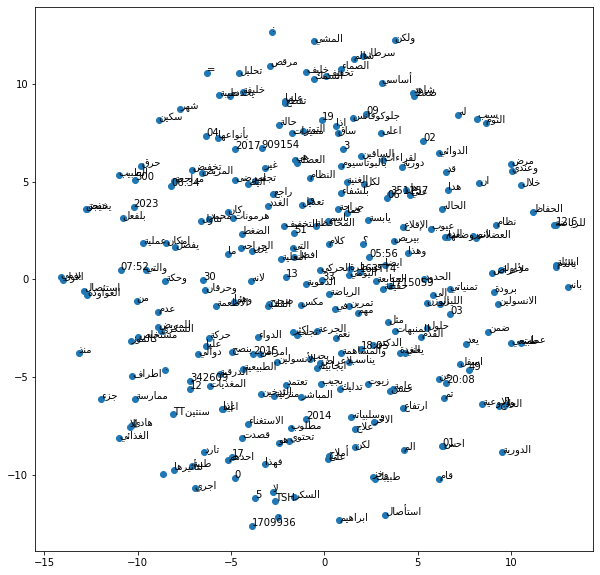

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from bidi.algorithm import get_display
from arabic_reshaper import arabic_reshaper

# تقليل الأبعاد باستخدام t-SNE
tsne = TSNE(n_components=2, random_state=0)
vectors_emb_2d = tsne.fit_transform(vectors_emb)

# رسم مخطط التشتت
plt.figure(figsize=(10, 10))
plt.scatter(vectors_emb_2d[:, 0], vectors_emb_2d[:, 1])

# إضافة التسميات إلى النقاط
for i, word in enumerate(token_index.keys()):
    # إعادة تشكيل الكلمة العربية وضبط اتجاه الكتابة
    reshaped_word = arabic_reshaper.reshape(word)
    bidi_text = get_display(reshaped_word)

    plt.annotate(bidi_text, (vectors_emb_2d[i, 0], vectors_emb_2d[i, 1]))

plt.show()


## [6.5]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import random

def analogy(word_a, word_b, word_c, vectors, token_index, top_k=5):
    # Get vectors for words A, B, and C
    vector_a = vectors[token_index[word_a]]
    vector_b = vectors[token_index[word_b]]
    vector_c = vectors[token_index[word_c]]

    # Calculate the analogy vector
    analogy_vector = vector_c - vector_a + vector_b

    # Calculate cosine similarities between the analogy vector and all other vectors
    similarities = cosine_similarity([analogy_vector], vectors)[0]

    # Get indices of top-k most similar words
    top_indices = similarities.argsort()[-top_k:][::-1]

    # Get the actual words corresponding to the top indices
    top_words = [word for word, idx in token_index.items() if idx in top_indices]

    return top_words

# Test the analogy function with 5 random examples
for _ in range(5):
    # Randomly select words A, B, C
    word_a = random.choice(list(token_index.keys()))
    word_b = random.choice(list(token_index.keys()))
    word_c = random.choice(list(token_index.keys()))

    # Avoid choosing the same word for A, B, C
    while word_a == word_b or word_b == word_c or word_c == word_a:
        word_a = random.choice(list(token_index.keys()))
        word_b = random.choice(list(token_index.keys()))
        word_c = random.choice(list(token_index.keys()))

    # Get the predicted word D
    predicted_words = analogy(word_a, word_b, word_c, vectors_emb, token_index)

    # Print the analogy
    print(f"{word_a} is to {word_b} as {word_c} is to {predicted_words}")

# Question [7]: Deep Neural Network

## [7.1]

### [7.1.1]

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import balanced_accuracy_score
import tensorflow as tf
from scipy.sparse import csr_matrix

# قراءة ملف التدريب
train_data = pd.read_csv('train.csv')

# البيانات للتدريب
X_train = train_data['question'].astype(str) + ' ' + train_data['answer'].astype(str)
y_train = train_data['label']

# البيانات للتحقق
val_data = pd.read_csv('val.csv')  # قم بتغيير اسم الملف إذا لزم الأمر
X_val = val_data['question'].astype(str) + ' ' + val_data['answer'].astype(str)
y_val = val_data['label']

# قراءة ملف الاختبار
test_data = pd.read_csv('test.csv')
# البيانات للاختبار
X_test = test_data['question'].astype(str) + ' ' + test_data['answer'].astype(str)
y_test = test_data['label']

# تحويل النصوص إلى Bag of Words باستخدام CountVectorizer
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_val_bow = vectorizer.transform(X_val)
X_test_bow = vectorizer.transform(X_test)

X_train_bow = csr_matrix(X_train_bow)
X_val_bow = csr_matrix(X_val_bow)
X_test_bow = csr_matrix(X_test_bow)

X_train_bow.sort_indices()
X_val_bow.sort_indices()
X_test_bow.sort_indices()

# ترميز الفئات
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# تحويل التسميات إلى تنسيق one-hot
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# بناء النموذج العصبوني الكامل
model = Sequential()
model.add(Dense(128, input_shape=(X_train_bow.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# تكوين النموذج
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# تدريب النموذج
model.fit(X_train_bow, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_val_bow, y_val_categorical))

# تقييم النموذج على مجموعة الاختبار
y_test_pred = model.predict(X_test_bow)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
accuracy_test = model.evaluate(X_test_bow, y_test_categorical)[1]
balance_accuracy_test = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)

# ملء جدول المقارنة
comparison_table['question_step_number'].append("7.1")
comparison_table['model_name'].append('fully_connected')
comparison_table['features'].append('Bag_of_Words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append('CountVectorizer')  # قم بتعديل هذا الجزء
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balance_accuracy_test)

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Balanced Accuracy: {balance_accuracy_test:.4f}")


Epoch 1/10
1649/1649 [==============================] - 598s 362ms/step - loss: 1.4916 - accuracy: 0.7270 - val_loss: 1.5983 - val_accuracy: 0.7182
Epoch 2/10
1649/1649 [==============================] - 620s 376ms/step - loss: 1.1436 - accuracy: 0.7524 - val_loss: 1.7663 - val_accuracy: 0.7024
Epoch 3/10
1649/1649 [==============================] - 613s 372ms/step - loss: 0.8196 - accuracy: 0.8249 - val_loss: 2.0979 - val_accuracy: 0.6698
Epoch 4/10
1649/1649 [==============================] - 608s 369ms/step - loss: 0.6215 - accuracy: 0.8812 - val_loss: 2.5947 - val_accuracy: 0.6580
Epoch 5/10
1649/1649 [==============================] - 607s 368ms/step - loss: 0.5683 - accuracy: 0.8941 - val_loss: 2.7583 - val_accuracy: 0.6705
Epoch 6/10
1649/1649 [==============================] - 601s 365ms/step - loss: 0.5588 - accuracy: 0.8959 - val_loss: 2.9377 - val_accuracy: 0.6587
Epoch 7/10
1649/1649 [==============================] - 601s 364ms/step - loss: 0.5536 - accuracy: 0.8963 - val_

NameError: ignored

**ملاحظة هامة:**

هنا لا يوجد error حقيقي

 ونتيجة التدريب قد ظهرت بالفعل، ولكن كنا قد نسينا تشغيل خلية تهيئة الجدول فظهر الخطأ التالي، ولذلك قمنا بنقل التعليمة الخاصة بها الى cell اخرى وتشغيلها توفيرا للوقت لكي لا نضطر لتشغيل الخلية القديمة مرة أخرى واعادة التدريب من جديد.

In [48]:
# ملء جدول المقارنة
comparison_table['question_step_number'].append("7.1")
comparison_table['model_name'].append('fully_connected')
comparison_table['features'].append('Bag_of_Words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append('CountVectorizer')  # قم بتعديل هذا الجزء
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balance_accuracy_test)

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Balanced Accuracy: {balance_accuracy_test:.4f}")

Test Accuracy: 0.6238
Test Balanced Accuracy: 0.1671


### [7.1.2]

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import balanced_accuracy_score
from scipy.sparse import csr_matrix
# قراءة ملف التدريب
train_data = pd.read_csv('train.csv')

# البيانات للتدريب
X_train = train_data['question'].astype(str) + ' ' + train_data['answer'].astype(str)
y_train = train_data['label']

# البيانات للتحقق
val_data = pd.read_csv('val.csv')  # قم بتغيير اسم الملف إذا لزم الأمر
X_val = val_data['question'].astype(str) + ' ' + val_data['answer'].astype(str)
y_val = val_data['label']

# قراءة ملف الاختبار
test_data = pd.read_csv('test.csv')
# البيانات للاختبار
X_test = test_data['question'].astype(str) + ' ' + test_data['answer'].astype(str)
y_test = test_data['label']

# تحويل النصوص إلى TF-IDF باستخدام TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_train_tfidf = csr_matrix(X_train_tfidf)
X_val_tfidf = csr_matrix(X_val_tfidf)
X_test_tfidf = csr_matrix(X_test_tfidf)

X_train_tfidf.sort_indices()
X_val_tfidf.sort_indices()
X_test_tfidf.sort_indices()

# ترميز الفئات
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# تحويل التسميات إلى تنسيق one-hot
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# بناء النموذج العصبوني الكامل
model = Sequential()
model.add(Dense(128, input_shape=(X_train_tfidf.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# تكوين النموذج
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# تدريب النموذج
model.fit(X_train_tfidf, y_train_categorical, epochs=20, batch_size=64, validation_data=(X_val_tfidf, y_val_categorical))

# تقييم النموذج على مجموعة الاختبار
y_test_pred = model.predict(X_test_tfidf)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
accuracy_test = model.evaluate(X_test_tfidf, y_test_categorical)[1]
balance_accuracy_test = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)




Epoch 1/20
825/825 [==============================] - 315s 380ms/step - loss: 1.6086 - accuracy: 0.6795 - val_loss: 1.5858 - val_accuracy: 0.7139
Epoch 2/20
825/825 [==============================] - 335s 406ms/step - loss: 1.1636 - accuracy: 0.7538 - val_loss: 1.7293 - val_accuracy: 0.6838
Epoch 3/20
825/825 [==============================] - 319s 386ms/step - loss: 0.9090 - accuracy: 0.8001 - val_loss: 1.9156 - val_accuracy: 0.6742
Epoch 4/20
825/825 [==============================] - 334s 404ms/step - loss: 0.7253 - accuracy: 0.8576 - val_loss: 2.2566 - val_accuracy: 0.6465
Epoch 5/20
825/825 [==============================] - 319s 387ms/step - loss: 0.6048 - accuracy: 0.8880 - val_loss: 2.4583 - val_accuracy: 0.6250
Epoch 6/20
825/825 [==============================] - 338s 410ms/step - loss: 0.5649 - accuracy: 0.8955 - val_loss: 2.5825 - val_accuracy: 0.6081
Epoch 7/20
825/825 [==============================] - 389s 471ms/step - loss: 0.5519 - accuracy: 0.8968 - val_loss: 2.6735 -

NameError: ignored

In [49]:
# ملء جدول المقارنة
comparison_table['question_step_number'].append("7.1")
comparison_table['model_name'].append('fully_connected')
comparison_table['features'].append('TF-IDF')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append('TfidfVectorizer')  # قم بتعديل هذا الجزء
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balance_accuracy_test)

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Balanced Accuracy: {balance_accuracy_test:.4f}")

Test Accuracy: 0.6238
Test Balanced Accuracy: 0.1671


## [7.2]

### [7.2.1]

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

#  مصفوفة أشعة الكلمات
word2vec_matrix = vectors_emb[:5]

# إنشاء النموذج
model_clean = Sequential()
model_clean.add(Embedding(input_dim=len(word2vec_matrix), output_dim=word2vec_matrix.shape[1],
                          weights=[word2vec_matrix], input_length=10, trainable=False))
model_clean.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_clean.add(GlobalMaxPooling1D())
model_clean.add(Dense(1, activation='sigmoid'))

# تجميع النموذج
model_clean.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج
model_clean.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


### [7.2.2]

In [ ]:
word2vec_matrix_trainable = vectors_emb[:5]

# إنشاء النموذج
model_trainable = Sequential()
model_trainable.add(Embedding(input_dim=len(word2vec_matrix_trainable), output_dim=word2vec_matrix_trainable.shape[1],
                              weights=[word2vec_matrix_trainable], input_length=max_sequence_length, trainable=True))
model_trainable.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_trainable.add(GlobalMaxPooling1D())
model_trainable.add(Dense(1, activation='sigmoid'))

# تجميع النموذج
model_trainable.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج
model_trainable.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


### [7.2.3]

In [ ]:
model_trainable_dynamic = Sequential()
model_trainable_dynamic.add(Embedding(input_dim=len(word2vec_matrix_trainable), output_dim=word2vec_matrix_trainable.shape[1],
                                      input_length=max_sequence_length))
model_trainable_dynamic.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_trainable_dynamic.add(GlobalMaxPooling1D())
model_trainable_dynamic.add(Dense(1, activation='sigmoid'))

# تجميع النموذج
model_trainable_dynamic.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج
model_trainable_dynamic.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


### [7.2.4]

In [ ]:
pretrained_matrix =

# إنشاء النموذج
model_pretrained_dynamic = Sequential()
model_pretrained_dynamic.add(Embedding(input_dim=len(pretrained_matrix), output_dim=pretrained_matrix.shape[1],
                                       input_length=max_sequence_length, weights=[pretrained_matrix], trainable=True))
model_pretrained_dynamic.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_pretrained_dynamic.add(GlobalMaxPooling1D())
model_pretrained_dynamic.add(Dense(1, activation='sigmoid'))

# تجميع النموذج
model_pretrained_dynamic.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج
model_pretrained_dynamic.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

## [7.3]

## Extra [7.4]

# Final Results

In [50]:
for key, value in comparison_table.items():
    print(f"Length of {key}: {len(value)}")


Length of question_step_number: 4
Length of model_name: 4
Length of features: 4
Length of model_parameters: 4
Length of preprocessing_methods: 4
Length of accuracy: 4
Length of balance_accuracy: 4


In [51]:
# تحويل comparison_table إلى DataFrame
df = pd.DataFrame(comparison_table)

# إزالة الصفوف التي تحتوي على قيم فارغة
df_cleaned = df.dropna()

# رسم الجدول
if not df_cleaned.empty:
    print(df_cleaned)
else:
    print("No data to display.")


  question_step_number           model_name      features model_parameters  \
0                  5.5  logistic_regression        TF-IDF          default   
1                  7.1      fully_connected  Bag_of_Words          default   
2                  7.1      fully_connected  Bag_of_Words          default   
3                  7.1      fully_connected        TF-IDF          default   

  preprocessing_methods  accuracy  balance_accuracy  
0          process_data  0.623848          0.167064  
1       CountVectorizer  0.623848          0.167064  
2       CountVectorizer  0.623848          0.167064  
3       TfidfVectorizer  0.623848          0.167064  


In [52]:
df.to_csv("[amal_rajab].csv", index=False)